In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'mps'

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
torch.manual_seed(42) # Reproducible results
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:04, 24.42it/s]                                                                                                        


Epoch 1 of 100
Generator loss: -0.23962473, Discriminator loss: 0.42953635


118it [00:04, 24.94it/s]                                                                                                        


Epoch 2 of 100
Generator loss: -0.00001906, Discriminator loss: 0.00003625


118it [00:04, 25.46it/s]                                                                                                        


Epoch 3 of 100
Generator loss: -0.24037784, Discriminator loss: 0.00265786


118it [00:04, 25.03it/s]                                                                                                        


Epoch 4 of 100
Generator loss: -0.45946863, Discriminator loss: 0.11290147


118it [00:04, 26.04it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


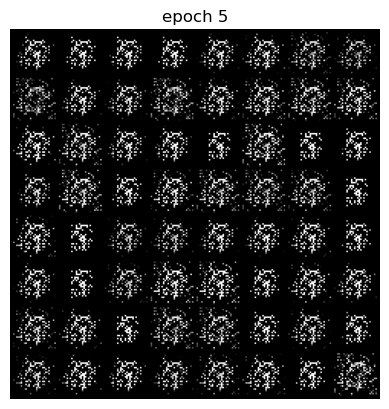

Epoch 5 of 100
Generator loss: -0.00019276, Discriminator loss: 0.00002727


118it [00:04, 24.98it/s]                                                                                                        


Epoch 6 of 100
Generator loss: -0.00009203, Discriminator loss: 0.00002217


118it [00:04, 26.03it/s]                                                                                                        


Epoch 7 of 100
Generator loss: -0.00007128, Discriminator loss: 0.00001851


118it [00:04, 26.02it/s]                                                                                                        


Epoch 8 of 100
Generator loss: -0.00004578, Discriminator loss: 0.00001564


118it [00:04, 24.83it/s]                                                                                                        


Epoch 9 of 100
Generator loss: -0.00005589, Discriminator loss: 0.00001559


118it [00:04, 26.46it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


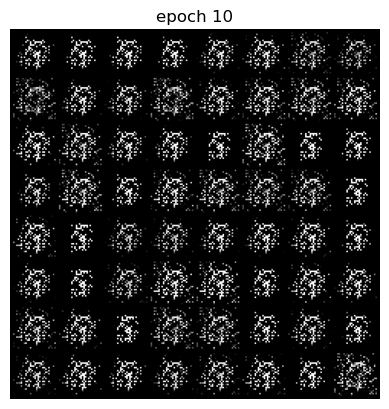

Epoch 10 of 100
Generator loss: -0.00004461, Discriminator loss: 0.00001270


118it [00:04, 24.86it/s]                                                                                                        


Epoch 11 of 100
Generator loss: -0.00003799, Discriminator loss: 0.00001088


118it [00:04, 25.39it/s]                                                                                                        


Epoch 12 of 100
Generator loss: -0.00002620, Discriminator loss: 0.00001132


118it [00:04, 25.37it/s]                                                                                                        


Epoch 13 of 100
Generator loss: -0.00001916, Discriminator loss: 0.00000837


118it [00:04, 25.31it/s]                                                                                                        


Epoch 14 of 100
Generator loss: -0.00003339, Discriminator loss: 0.00000815


118it [00:04, 25.32it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


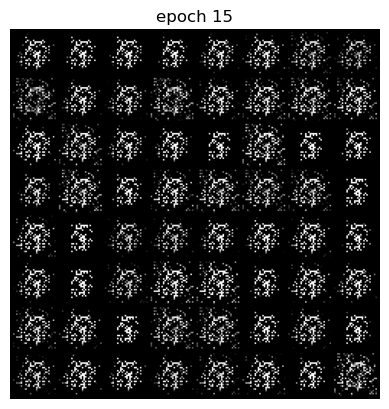

Epoch 15 of 100
Generator loss: -0.00000728, Discriminator loss: 0.00006442


118it [00:04, 25.82it/s]                                                                                                        


Epoch 16 of 100
Generator loss: -0.00000020, Discriminator loss: 0.00000827


118it [00:04, 26.04it/s]                                                                                                        


Epoch 17 of 100
Generator loss: -0.00000052, Discriminator loss: 0.00000509


118it [00:04, 25.56it/s]                                                                                                        


Epoch 18 of 100
Generator loss: -0.00000061, Discriminator loss: 0.00000367


118it [00:04, 24.93it/s]                                                                                                        


Epoch 19 of 100
Generator loss: -0.00000215, Discriminator loss: 0.00000290


118it [00:04, 25.79it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


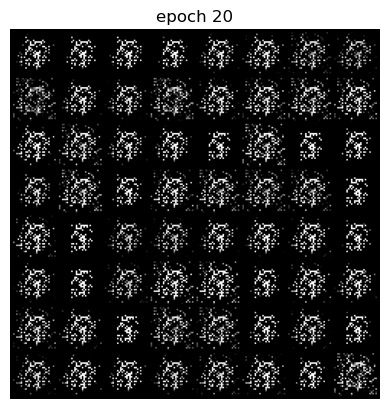

Epoch 20 of 100
Generator loss: -0.00000070, Discriminator loss: 0.00002764


118it [00:04, 25.85it/s]                                                                                                        


Epoch 21 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000677


118it [00:04, 25.83it/s]                                                                                                        


Epoch 22 of 100
Generator loss: -0.00000007, Discriminator loss: 0.00000328


118it [00:04, 25.56it/s]                                                                                                        


Epoch 23 of 100
Generator loss: -0.00000007, Discriminator loss: 0.00000238


118it [00:04, 26.18it/s]                                                                                                        


Epoch 24 of 100
Generator loss: -0.00000019, Discriminator loss: 0.00000186


118it [00:04, 26.01it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


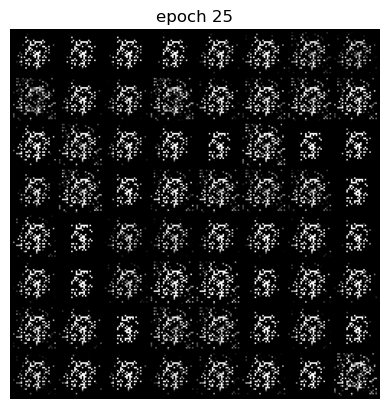

Epoch 25 of 100
Generator loss: -0.00000028, Discriminator loss: 0.00000153


118it [00:04, 25.30it/s]                                                                                                        


Epoch 26 of 100
Generator loss: -0.00000015, Discriminator loss: 0.00000125


118it [00:04, 25.57it/s]                                                                                                        


Epoch 27 of 100
Generator loss: -0.00000117, Discriminator loss: 0.00000116


118it [00:04, 25.47it/s]                                                                                                        


Epoch 28 of 100
Generator loss: -0.00000073, Discriminator loss: 0.00000101


118it [00:04, 26.16it/s]                                                                                                        


Epoch 29 of 100
Generator loss: -0.00000083, Discriminator loss: 0.00000092


118it [00:04, 25.78it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


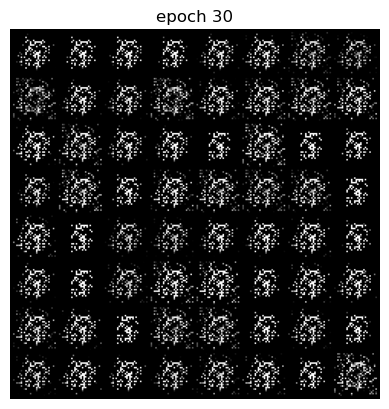

Epoch 30 of 100
Generator loss: -0.00000167, Discriminator loss: 0.00000090


118it [00:04, 25.11it/s]                                                                                                        


Epoch 31 of 100
Generator loss: -0.00000078, Discriminator loss: 0.00000102


118it [00:04, 25.62it/s]                                                                                                        


Epoch 32 of 100
Generator loss: -0.00000064, Discriminator loss: 0.00000077


118it [00:04, 26.11it/s]                                                                                                        


Epoch 33 of 100
Generator loss: -0.00000077, Discriminator loss: 0.00000071


118it [00:04, 25.83it/s]                                                                                                        


Epoch 34 of 100
Generator loss: -0.00000102, Discriminator loss: 0.00000074


118it [00:04, 25.80it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


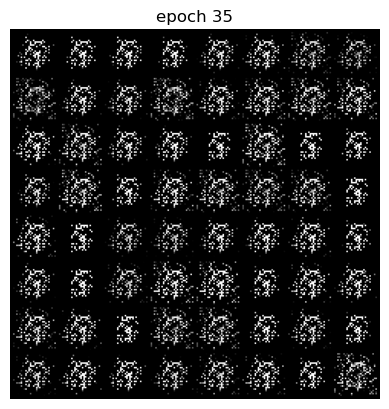

Epoch 35 of 100
Generator loss: -0.00000074, Discriminator loss: 0.00000059


118it [00:04, 25.79it/s]                                                                                                        


Epoch 36 of 100
Generator loss: -0.00000072, Discriminator loss: 0.00000057


118it [00:04, 26.38it/s]                                                                                                        


Epoch 37 of 100
Generator loss: -0.00000096, Discriminator loss: 0.00000060


118it [00:04, 25.34it/s]                                                                                                        


Epoch 38 of 100
Generator loss: -0.00000098, Discriminator loss: 0.00000050


118it [00:04, 25.00it/s]                                                                                                        


Epoch 39 of 100
Generator loss: -0.00000126, Discriminator loss: 0.00000043


118it [00:04, 25.65it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


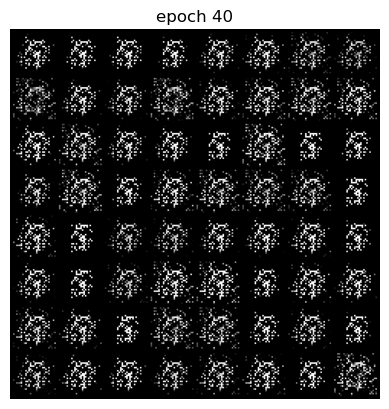

Epoch 40 of 100
Generator loss: -0.00000111, Discriminator loss: 0.00000050


118it [00:04, 25.09it/s]                                                                                                        


Epoch 41 of 100
Generator loss: -0.00000489, Discriminator loss: 0.00000041


118it [00:04, 26.08it/s]                                                                                                        


Epoch 42 of 100
Generator loss: -0.00000049, Discriminator loss: 0.00000037


118it [00:04, 25.46it/s]                                                                                                        


Epoch 43 of 100
Generator loss: -0.00000088, Discriminator loss: 0.00000042


118it [00:04, 25.85it/s]                                                                                                        


Epoch 44 of 100
Generator loss: -0.00000139, Discriminator loss: 0.00000041


118it [00:04, 25.76it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


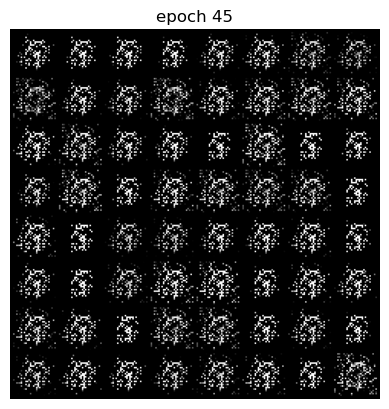

Epoch 45 of 100
Generator loss: -0.00000065, Discriminator loss: 0.00000033


118it [00:04, 25.94it/s]                                                                                                        


Epoch 46 of 100
Generator loss: -0.00000288, Discriminator loss: 0.00000033


118it [00:04, 26.09it/s]                                                                                                        


Epoch 47 of 100
Generator loss: -0.00000030, Discriminator loss: 0.00000051


118it [00:04, 25.64it/s]                                                                                                        


Epoch 48 of 100
Generator loss: -0.00000046, Discriminator loss: 0.00000029


118it [00:04, 25.88it/s]                                                                                                        


Epoch 49 of 100
Generator loss: -0.00000036, Discriminator loss: 0.00000029


118it [00:04, 26.82it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


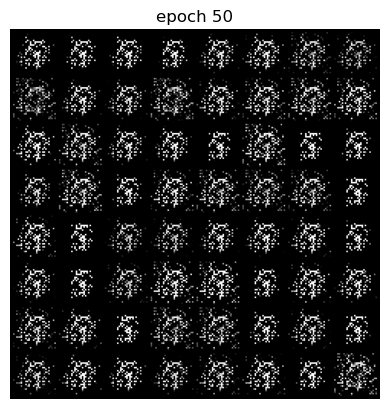

Epoch 50 of 100
Generator loss: -0.00000046, Discriminator loss: 0.00000028


118it [00:04, 25.85it/s]                                                                                                        


Epoch 51 of 100
Generator loss: -0.00000193, Discriminator loss: 0.00000024


118it [00:04, 25.73it/s]                                                                                                        


Epoch 52 of 100
Generator loss: -0.00000046, Discriminator loss: 0.00000023


118it [00:04, 25.69it/s]                                                                                                        


Epoch 53 of 100
Generator loss: -0.00000032, Discriminator loss: 0.00000041


118it [00:04, 25.17it/s]                                                                                                        


Epoch 54 of 100
Generator loss: -0.00000017, Discriminator loss: 0.00000025


118it [00:04, 25.79it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


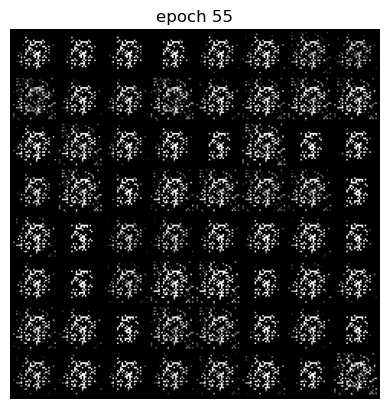

Epoch 55 of 100
Generator loss: -0.00000007, Discriminator loss: 0.00000020


118it [00:04, 25.83it/s]                                                                                                        


Epoch 56 of 100
Generator loss: -0.00000030, Discriminator loss: 0.00000018


118it [00:04, 25.50it/s]                                                                                                        


Epoch 57 of 100
Generator loss: -0.00000026, Discriminator loss: 0.00000019


118it [00:04, 25.86it/s]                                                                                                        


Epoch 58 of 100
Generator loss: -0.00000010, Discriminator loss: 0.00000017


118it [00:04, 25.68it/s]                                                                                                        


Epoch 59 of 100
Generator loss: -0.00000016, Discriminator loss: 0.00000015


118it [00:04, 25.78it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


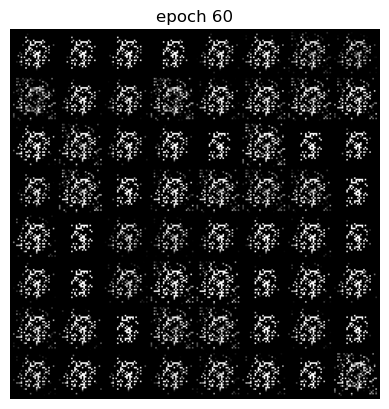

Epoch 60 of 100
Generator loss: -0.00000014, Discriminator loss: 0.00000013


118it [00:04, 25.67it/s]                                                                                                        


Epoch 61 of 100
Generator loss: -0.00000034, Discriminator loss: 0.00000012


118it [00:04, 25.88it/s]                                                                                                        


Epoch 62 of 100
Generator loss: -0.00000020, Discriminator loss: 0.00000011


118it [00:04, 25.86it/s]                                                                                                        


Epoch 63 of 100
Generator loss: -0.00000028, Discriminator loss: 0.00000012


118it [00:04, 26.66it/s]                                                                                                        


Epoch 64 of 100
Generator loss: -0.00000102, Discriminator loss: 0.00000010


118it [00:04, 25.69it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


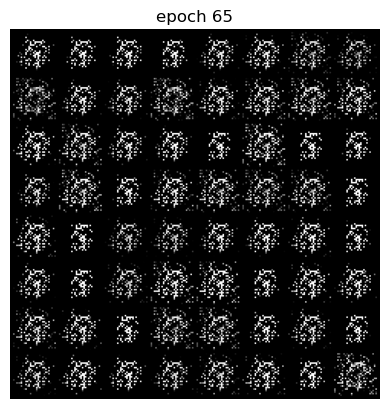

Epoch 65 of 100
Generator loss: -0.00000049, Discriminator loss: 0.00000015


118it [00:04, 25.52it/s]                                                                                                        


Epoch 66 of 100
Generator loss: -0.00000018, Discriminator loss: 0.00000010


118it [00:04, 25.61it/s]                                                                                                        


Epoch 67 of 100
Generator loss: -0.00000015, Discriminator loss: 0.00000008


118it [00:04, 26.69it/s]                                                                                                        


Epoch 68 of 100
Generator loss: -0.00000068, Discriminator loss: 0.00000008


118it [00:04, 25.91it/s]                                                                                                        


Epoch 69 of 100
Generator loss: -0.00000061, Discriminator loss: 0.00000009


118it [00:04, 26.02it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


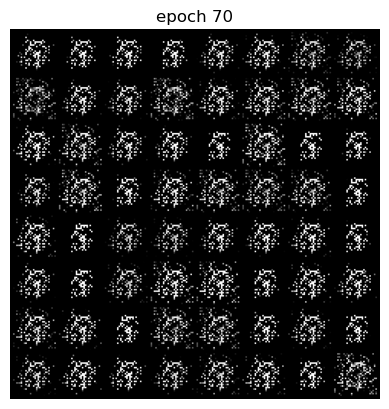

Epoch 70 of 100
Generator loss: -0.00000046, Discriminator loss: 0.00000013


118it [00:04, 25.47it/s]                                                                                                        


Epoch 71 of 100
Generator loss: -0.00000011, Discriminator loss: 0.00000153


118it [00:04, 25.43it/s]                                                                                                        


Epoch 72 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000035


118it [00:04, 25.46it/s]                                                                                                        


Epoch 73 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000012


118it [00:04, 25.05it/s]                                                                                                        


Epoch 74 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000009


118it [00:04, 25.51it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


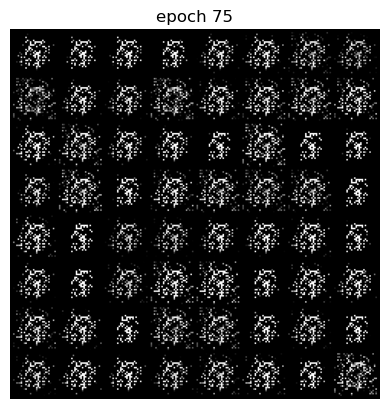

Epoch 75 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000006


118it [00:04, 25.98it/s]                                                                                                        


Epoch 76 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000005


118it [00:04, 26.13it/s]                                                                                                        


Epoch 77 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000004


118it [00:04, 25.93it/s]                                                                                                        


Epoch 78 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000004


118it [00:04, 26.76it/s]                                                                                                        


Epoch 79 of 100
Generator loss: -0.00000009, Discriminator loss: 0.00000004


118it [00:04, 25.54it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


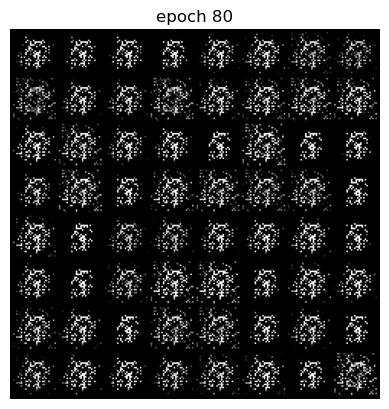

Epoch 80 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000003


118it [00:04, 25.61it/s]                                                                                                        


Epoch 81 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000005


118it [00:04, 26.14it/s]                                                                                                        


Epoch 82 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000003


118it [00:04, 25.59it/s]                                                                                                        


Epoch 83 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000002


118it [00:04, 25.45it/s]                                                                                                        


Epoch 84 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000004


118it [00:04, 25.92it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


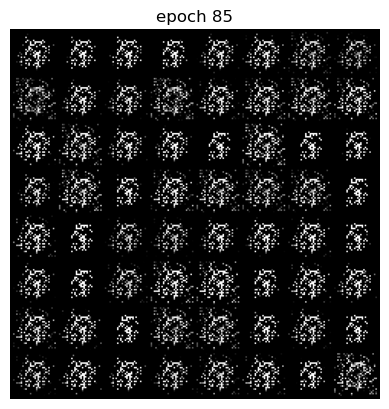

Epoch 85 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000002


118it [00:04, 25.83it/s]                                                                                                        


Epoch 86 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000002


118it [00:04, 26.12it/s]                                                                                                        


Epoch 87 of 100
Generator loss: -0.00000006, Discriminator loss: 0.00000002


118it [00:04, 26.17it/s]                                                                                                        


Epoch 88 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000002


118it [00:04, 25.41it/s]                                                                                                        


Epoch 89 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000002


118it [00:04, 26.33it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


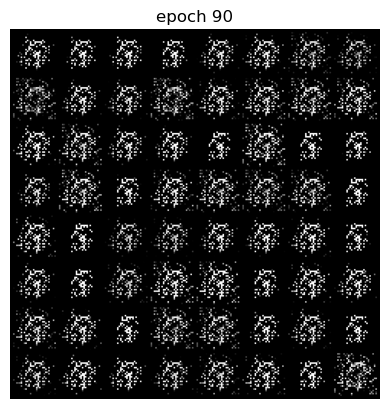

Epoch 90 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000002


118it [00:05, 21.34it/s]                                                                                                        


Epoch 91 of 100
Generator loss: -0.00000011, Discriminator loss: 0.00000001


118it [00:05, 22.54it/s]                                                                                                        


Epoch 92 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000031


118it [00:04, 24.63it/s]                                                                                                        


Epoch 93 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000014


118it [00:04, 25.29it/s]                                                                                                        


Epoch 94 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:04, 25.01it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


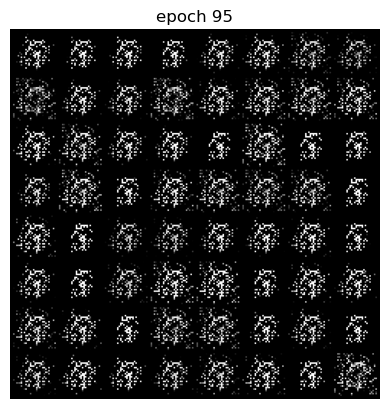

Epoch 95 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:04, 25.37it/s]                                                                                                        


Epoch 96 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:04, 24.57it/s]                                                                                                        


Epoch 97 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000001


118it [00:04, 24.84it/s]                                                                                                        


Epoch 98 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:04, 24.00it/s]                                                                                                        


Epoch 99 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:04, 24.89it/s]                                                                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


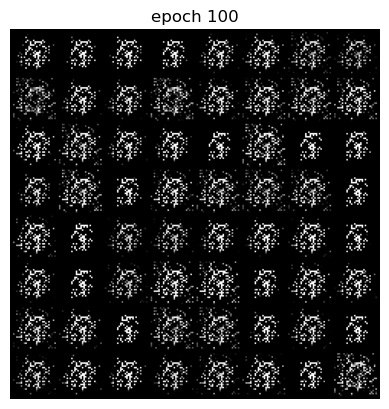

Epoch 100 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return -criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return (criterion(output[true_label == 1], true_label[true_label == 1])
            + criterion(output[true_label == 0], true_label[true_label == 0]))
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        X, _ = data
        X = X.to(device)
        
        # Optimize Discriminator
        for _ in range(k):
            # Forward Pass
            # Output
            inputs = torch.cat((X, generator(create_noise(sample_size, nz))))
            output = discriminator(inputs)
            labels = torch.cat((label_real(X.shape[0]), label_fake(sample_size)))
            
            # Loss
            d_loss = discriminator_loss(output, labels)
            
            # Backward pass
            optim_d.zero_grad()
            d_loss.backward()
            optim_d.step()
            
        # Optimize Generator
        # Forward Pass
        inputs = generator(noise)
        output = discriminator(inputs)
        labels = label_fake(sample_size)
        
        # Loss
        g_loss = generator_loss(output, labels)
        
        # Backward Pass
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        
        # Accumulate losses
        loss_g += g_loss.item()
        # Do not accumulate losses inside the for-k loop
        loss_d += d_loss.item() # Last iteration loss
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

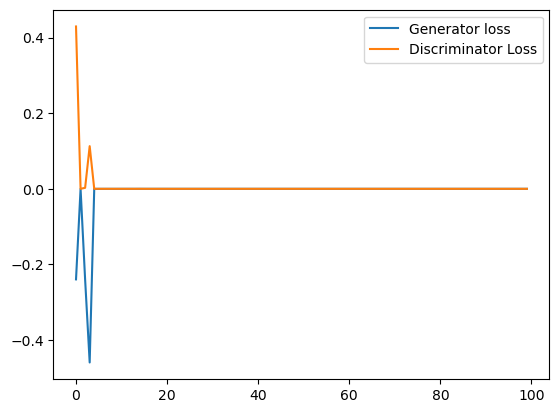

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')